In [ ]:
# Tiểu luận: Lý thuyết Xác suất và Thống kê dành cho Máy học.
# Thông tin tác giả:
## Học viên cao học: Nguyễn Xuân Hiền. Mã học viên: 2470749.
## Người hướng dẫn khoa học: TS Nguyễn An Khương, TS Trần Tuấn Anh.
## Bộ môn: Cơ sở toán. Ngành: Khoa học máy tính.
## Khoa Kỹ thuật và Khoa học máy tính - Trường đại học Bách Khoa TP.Hồ Chí Minh.
## Ghi chú: Mã nguồn này là một bộ phận không thể tách rời của Tiểu luận.
# Lịch sử phiên bản.
## Ngày 2025-06-03: Hoàn thiện phiên bản 1.0.
# Nguồn tham khảo:
## Lý thuyết về xác suất thống kê: https://d2l.ai/chapter_preliminaries/probability.html

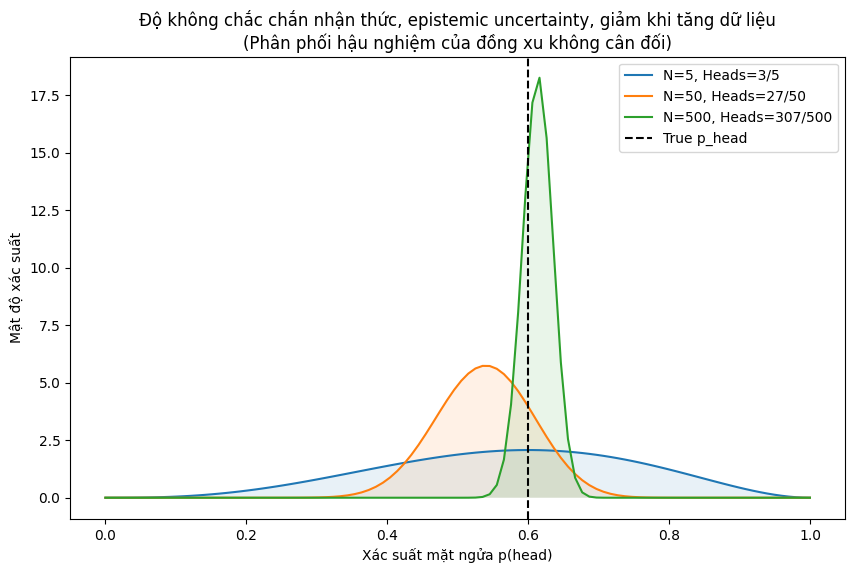

In [6]:
# Bài tập 1
# Tải thư viện
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
# Giả lập đồng xu mất cân đối thật sự
true_p_head = 0.6
np.random.seed(0)
# Thí nghiệm: Tung đồng xu N lần và cập nhật độ không chắc chắn
def experiment(N_trials):
    data = np.random.binomial(1, true_p_head, N_trials)
    heads = sum(data)
    tails = N_trials - heads
    # Bayesian suy luận với ưu tiên là Beta(1,1) ~ Đồng nhất (Uniform)
    posterior = beta(1 + heads, 1 + tails)
    # Vẽ phân phối hậu nghiệm (posterior)
    x = np.linspace(0, 1, 100)
    plt.plot(x, posterior.pdf(x), label=f'N={N_trials}, Heads={heads}/{N_trials}')
    plt.fill_between(x, posterior.pdf(x), alpha=0.1)
# Chạy thí nghiệm với số lần tung khác nhau
plt.figure(figsize=(10, 6))
# Rất ít dữ liệu -> Độ không chắc chắn cao
experiment(N_trials=5)
# Độ không chắc chắn giảm
experiment(N_trials=50)
# Hội tụ về xác suất thực
experiment(N_trials=500)
# Biểu diễn bằng đồ thị
plt.axvline(true_p_head, color='black', linestyle='--', label='True p_head')
plt.title('Độ không chắc chắn nhận thức, epistemic uncertainty, giảm khi tăng dữ liệu\n(Phân phối hậu nghiệm của đồng xu không cân đối)')
plt.xlabel('Xác suất mặt ngửa p(head)')
plt.ylabel('Mật độ xác suất')
plt.legend()
plt.show()

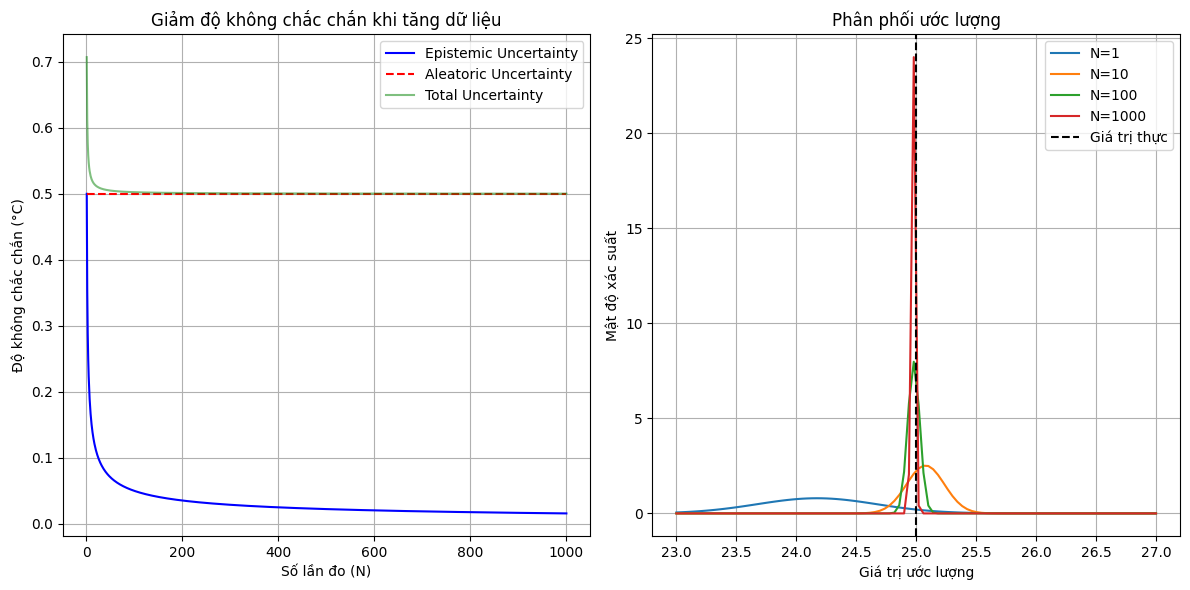

N=1: Mean=24.96°C, Epistemic uncert.=0.5000°C, Total uncert.=0.7071°C
N=5: Mean=24.98°C, Epistemic uncert.=0.2236°C, Total uncert.=0.5477°C
N=10: Mean=25.06°C, Epistemic uncert.=0.1581°C, Total uncert.=0.5244°C
N=50: Mean=25.07°C, Epistemic uncert.=0.0707°C, Total uncert.=0.5050°C
N=100: Mean=25.08°C, Epistemic uncert.=0.0500°C, Total uncert.=0.5025°C
N=1000: Mean=24.99°C, Epistemic uncert.=0.0158°C, Total uncert.=0.5002°C


In [4]:
# Bài tập 2
# Tải thư viện
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
# Thiết lập tham số
np.random.seed(42)
# Giá trị đo lường thực (nhiệt độ)
true_value = 25.0
# Nhiễu hệ thống không thể loại bỏ (aleatoric)
aleatoric_noise_std = 0.5
# Hàm mô phỏng quá trình đo lường
def simulate_measurement(N_observations):
    # Tạo dữ liệu: giá trị thực + nhiễu ngẫu nhiên
    measurements = true_value + np.random.normal(0, aleatoric_noise_std, N_observations)
    # Tính trung bình và độ không chắc chắn
    mean_estimate = np.mean(measurements)
    # Giảm theo căn bậc 2 của N
    epistemic_uncertainty = aleatoric_noise_std / np.sqrt(N_observations)
    # Tổng độ không chắc chắn = epistemic + aleatoric (không đổi)
    total_uncertainty = np.sqrt(epistemic_uncertainty**2 + aleatoric_noise_std**2)
    return mean_estimate, epistemic_uncertainty, total_uncertainty
# Chạy mô phỏng với số lần đo từ 1 đến 1000
N_range = np.arange(1, 1001)
results = [simulate_measurement(N) for N in N_range]
means, epistemic_uncerts, total_uncerts = zip(*results)
# Vẽ đồ thị
plt.figure(figsize=(12, 6))
# Đồ thị 1: Độ không chắc chắn theo số lần đo
plt.subplot(1, 2, 1)
plt.plot(N_range, epistemic_uncerts, label='Epistemic Uncertainty', color='blue')
plt.plot(N_range, [aleatoric_noise_std]*len(N_range), 'r--', label='Aleatoric Uncertainty')
plt.plot(N_range, total_uncerts, 'g-', label='Total Uncertainty', alpha=0.5)
plt.xlabel('Số lần đo (N)')
plt.ylabel('Độ không chắc chắn (°C)')
plt.title('Giảm độ không chắc chắn khi tăng dữ liệu')
plt.legend()
plt.grid(True)
# Đồ thị 2: Phân phối ước lượng ở các giai đoạn
plt.subplot(1, 2, 2)
for N in [1, 10, 100, 1000]:
    mean, epistemic_uncert, _ = simulate_measurement(N)
    x = np.linspace(true_value-2, true_value+2, 100)
    y = norm.pdf(x, mean, epistemic_uncert)
    plt.plot(x, y, label=f'N={N}')
plt.axvline(true_value, color='black', linestyle='--', label='Giá trị thực')
plt.xlabel('Giá trị ước lượng')
plt.ylabel('Mật độ xác suất')
plt.title('Phân phối ước lượng')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# In kết quả tại các mốc quan trọng
for N in [1, 5, 10, 50, 100, 1000]:
    mean, epistemic, total = simulate_measurement(N)
    print(f'N={N}: Mean={mean:.2f}°C, Epistemic uncert.={epistemic:.4f}°C, Total uncert.={total:.4f}°C')

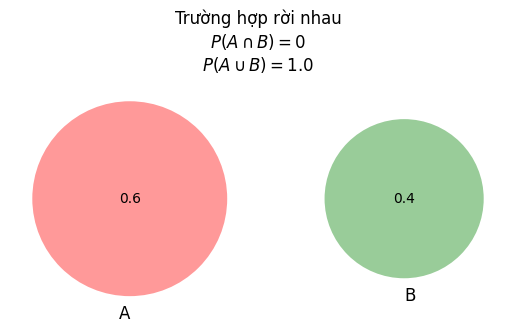

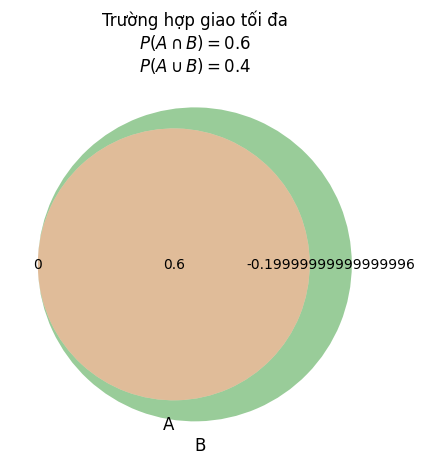

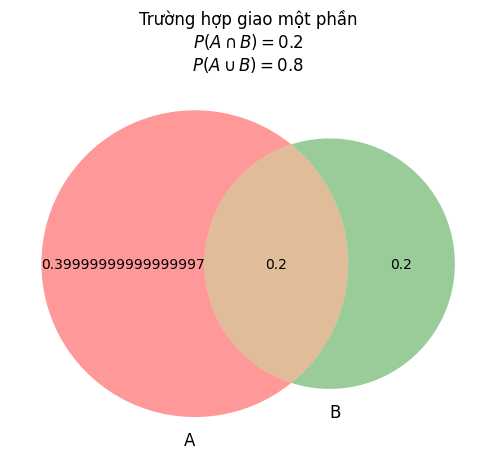

In [2]:
# Bài tập 5
# Tải thư viện
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
# Xác suất của biến cố A và B
P_A = 0.60
P_B = 0.40
# Trường hợp 1: A và B rời nhau (không giao nhau)
venn2(subsets=(P_A, P_B, 0), set_labels=('A', 'B'))
plt.title(f'Trường hợp rời nhau\n$P(A \cap B) = 0$\n$P(A \cup B) = {P_A + P_B}$')
plt.show()
# Trường hợp 2: A và B giao nhau tối đa (A nằm trong B)
venn2(subsets=(0, P_B - P_A, P_A), set_labels=('A', 'B'))
plt.title(f'Trường hợp giao tối đa\n$P(A \cap B) = {P_A}$\n$P(A \cup B) = {P_B}$')
plt.show()
# Trường hợp 3: A và B giao nhau một phần (tuỳ chọn)
P_AnB = 0.2  # Giả sử P(A ∩ B) = 0.2
venn2(subsets=(P_A - P_AnB, P_B - P_AnB, P_AnB), set_labels=('A', 'B'))
plt.title(f'Trường hợp giao một phần\n$P(A \cap B) = {P_AnB}$\n$P(A \cup B) = {P_A + P_B - P_AnB}$')
plt.show()

In [3]:
# Bài tập 6:
# Giả sử:
P_A = 0.6
P_B_given_A = 0.7
P_C_given_B = 0.8
# Tính P(A,B,C)
joint_prob = P_A * P_B_given_A * P_C_given_B
print(f"P(A, B, C) = {joint_prob:.3f}")

P(A, B, C) = 0.336


In [5]:
# Bài tập 8
# Tải thư viện
import numpy as np
import cvxpy as cp
# Dữ liệu mẫu
mu = np.array([0.1, 0.2])
Sigma = np.array([[0.04, 0.02], [0.02, 0.09]])
sigma_max = 0.05
# Biến tối ưu
alpha = cp.Variable(2)
objective = cp.Maximize(mu.T @ alpha)
constraints = [
    cp.quad_form(alpha, Sigma) <= sigma_max,
    cp.sum(alpha) == 1,
    alpha >= 0
]
prob = cp.Problem(objective, constraints)
prob.solve()
print("Trọng số tối ưu:", alpha.value)

Trọng số tối ưu: [0.37716097 0.62283903]
